In [1]:
import pandas as pd
import numpy as np


In [6]:
#Load the dataset into a pandas dataframe
df = pd.read_csv('/kaggle/input/the-movies-dataset/movies_metadata.csv')

#Display the first five movies in the dataframe
df.head(-5)


/tmp/ipykernel_33/1662296926.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/the-movies-dataset/movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45456,False,NaN,0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,84419,tt0038621,en,House of Horrors,An unsuccessful sculptor saves a madman named ...,...,1946-03-29,0.0,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Meet...The CREEPER!,House of Horrors,False,6.3,8.0
45457,False,NaN,0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 27, '...",NaN,390959,tt0265736,en,Shadow of the Blair Witch,"In this true-crime documentary, we delve into ...",...,2000-10-22,0.0,45.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Shadow of the Blair Witch,False,7.0,2.0
45458,False,NaN,0,"[{'id': 27, 'name': 'Horror'}]",NaN,289923,tt0252966,en,The Burkittsville 7,A film archivist revisits the story of Rustin ...,...,2000-10-03,0.0,30.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Do you know what happened 50 years before ""The...",The Burkittsville 7,False,7.0,1.0
45459,False,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,222848,tt0112613,en,Caged Heat 3000,It's the year 3000 AD. The world's most danger...,...,1995-01-01,0.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Caged Heat 3000,False,3.5,1.0


In [7]:
# Calculate the number of votes garnered by the 80th percentile movie
m = df['vote_count'].quantile(0.80)
print(m)


50.0


In [8]:
# Only consider movies longer than 45 minutes and shorter than 300 minutes
q_movies = df[(df['runtime'] >= 45) & (df['runtime'] <= 300)]

# Only consider movies that have garnered more than m votes
q_movies = q_movies[q_movies['vote_count'] >= m]

# Inspect the number of movies that made the cut
print(q_movies.shape)


(8963, 24)


In [9]:
# Calculate C, the mean rating for all movies in the dataset
C = df['vote_average'].mean()
print(C)


5.618207215134185


In [10]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']  # the number of votes for the movie
    R = x['vote_average']  # the average rating of the movie
    # Compute the weighted score
    return (v / (v + m) * R) + (m / (m + v) * C)


In [11]:
# Compute the score using the weighted_rating function defined above
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)


In [12]:
# Sort movies in descending order of their scores
q_movies = q_movies.sort_values('score', ascending=False)

# Print the top 25 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(25)


,title,vote_count,vote_average,score
10309,Dilwale Dulhania Le Jayenge,661.0,9.1,8.855148
314,The Shawshank Redemption,8358.0,8.5,8.482863
834,The Godfather,6024.0,8.5,8.476278
40251,Your Name.,1030.0,8.5,8.366584
12481,The Dark Knight,12269.0,8.3,8.289115
2843,Fight Club,9678.0,8.3,8.286216
292,Pulp Fiction,8670.0,8.3,8.284623
522,Schindler's List,4436.0,8.3,8.270109
23673,Whiplash,4376.0,8.3,8.269704
5481,Spirited Away,3968.0,8.3,8.266628


In [13]:
# Set a revenue threshold
revenue_threshold = 100000000  # For example, $100 million

# Filter movies with revenue above the threshold
high_revenue_movies = q_movies[q_movies['revenue'] > revenue_threshold]

print(high_revenue_movies.shape)


(1358, 25)


In [14]:
# Check for missing values
missing_values = q_movies.isnull().sum()
print(missing_values)


adult                       0
belongs_to_collection    6991
budget                      0
genres                      0
homepage                 6224
id                          0
imdb_id                     0
original_language           0
original_title              0
overview                   10
popularity                  0
poster_path                 0
production_companies        0
production_countries        0
release_date                1
revenue                     0
runtime                     0
spoken_languages            0
status                      0
tagline                  1930
title                       0
video                       0
vote_average                0
vote_count                  0
score                       0
dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


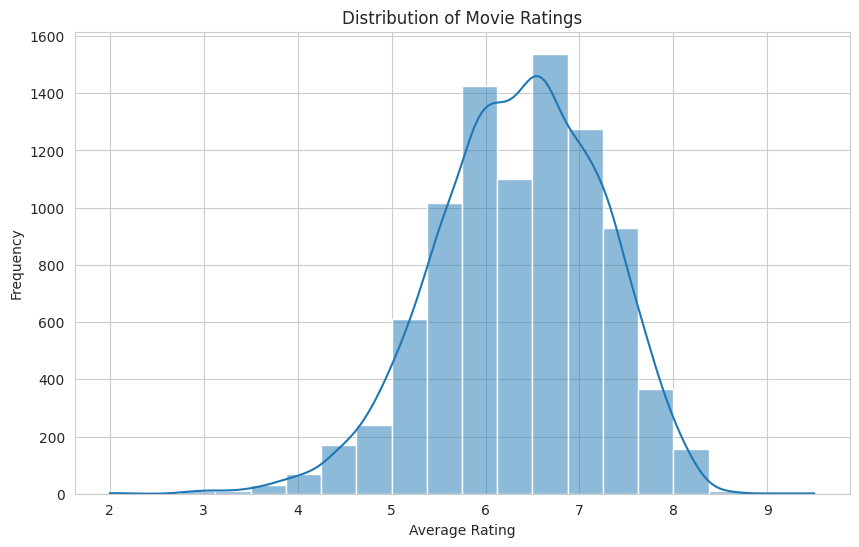

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(q_movies['vote_average'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()
